## Sentiment Polarity Analysis using Product reviews on Amazon India

In [1]:
# Importing necessary Libraries
import pandas as pd 
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

### Understanding the Dataset

In [2]:
# Reading the dataset
df = pd.read_csv(r'C:\Users\mmujtaba\Downloads\amazon_India_reviews.csv')


       

In [3]:
df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,06/09/2019,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,14/08/2019,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,19/10/2019,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,16/09/2019,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,18/08/2019,5,I have been trying different onion oil for my ...


In [4]:
df.shape

(2782, 5)

In [5]:
df.dtypes

asin      object
name      object
date      object
rating     int64
review    object
dtype: object

### The dataset consists of 2782 rows and 5 columns:-

####asin : Amazon Standard Identification Number - a unique number for every product

####name : Name of the product

####date : Date on which review was posted

####rating : Rating given to the product ( out of 5 )

####review : Review given to the product

### Data Cleaning Process

In [6]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    6
dtype: int64

#### We will remove the 6 entries which have null values

In [9]:
df.dropna(inplace=True)
df = df.reset_index()
df = df.drop(['index'], axis = 1) 
# Data shape after dropping the null values
df.shape

(2776, 5)

In [10]:
# Unique no of products
len(df['name'].unique())

122

#### There are a total of 122 unique products in the dataset

In [11]:
df['name'].sample(n=3)

253      Godrej-No-1-Bathing-Soap-Turmeric
1188    Dettol-Liquid-Refill-Original-1500
2122     Society-Daily-Elachi-Premix-Pouch
Name: name, dtype: object

In [12]:
# Creating the function to get unique brand names
def get_brand(x):
    return x.split('-')[0]
df['brand'] = df['name'].apply(get_brand)

In [13]:
# Finding the unique brand names
df['brand'].unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

In [14]:
# Deduplicating the brand names due to upper and lower case
df['brand'] = df['brand'].str.replace('PATANJALI', 'Patanjali')
df['brand'] = df['brand'].str.replace('MYSORE', 'Mysore')

In [15]:
len(df['brand'].unique())

24

#### There are 24 unique brands in the dataset

### Data Visualization

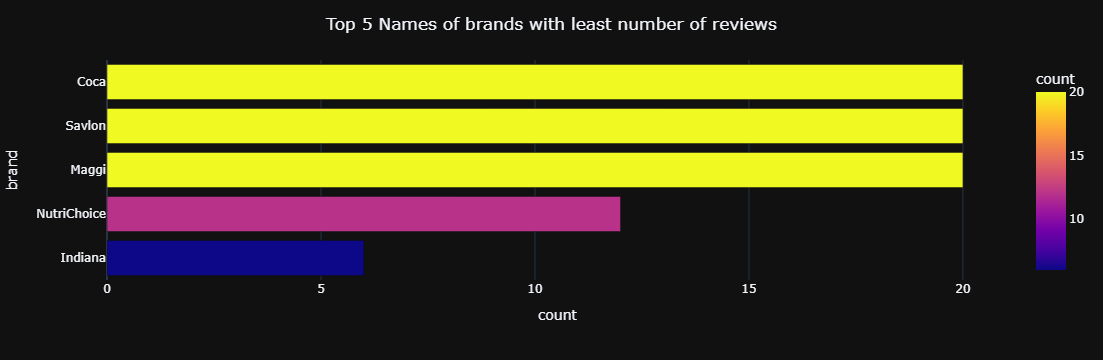

In [16]:
df1 = pd.DataFrame(df.groupby('brand')['asin'].count().reset_index())
df1.columns=['brand','count']
sort_df = df1.sort_values(['count'],ascending=True)

# Plotting a barplot for 5 brands with least number of reviews
fig = px.bar(sort_df.iloc[:5,:],y='brand',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='Top 5 Names of brands with least number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

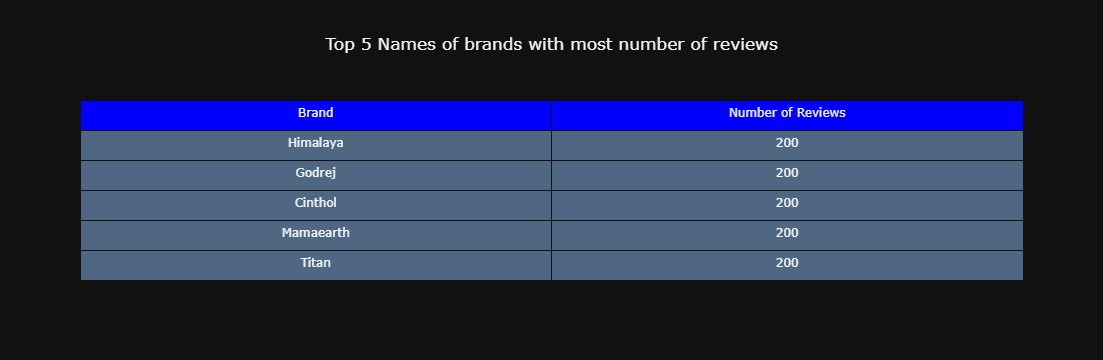

In [17]:
brand = sort_df.iloc[-5:,:]['brand'].tolist()
count=sort_df.iloc[-5:,:]['count'].tolist()

fig = go.Figure(data=[go.Table(header=dict(values=['Brand','Number of Reviews'],
                                          fill_color='blue',
                                           height=30),
                 cells=dict(values=[brand,count],
                            height=30))
                     ])
# Top 5 brand names in terms of number of reviews
fig.update_layout(title_text='Top 5 Names of brands with most number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmujtaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Loading the stop words of a specific language
stop_words = stopwords.words('english')

corpus = []
for i in range(0,len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)

### Word Cloud of all Reviews

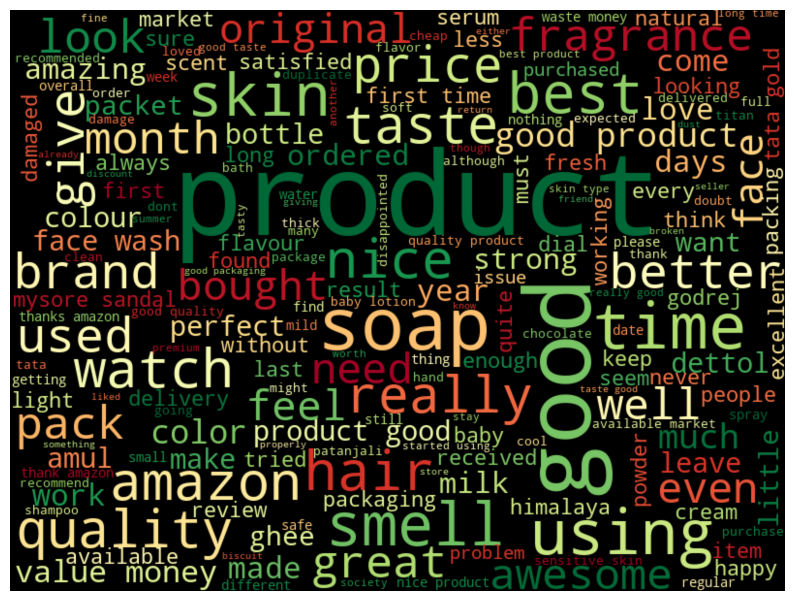

In [20]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

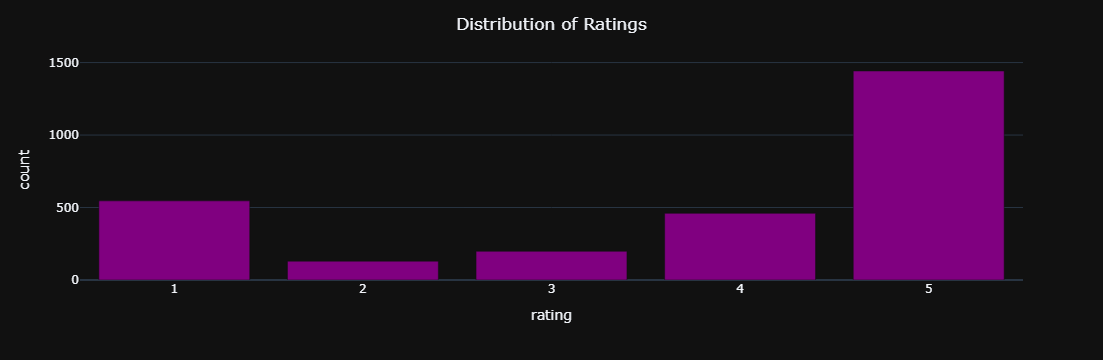

In [21]:
rating_df = pd.DataFrame(df['rating'].value_counts().reset_index())
rating_df.columns=['rating','count']

fig = px.bar(rating_df,x='rating',y='count',
            color_discrete_sequence=['purple'])
fig.update_layout(title_text='Distribution of Ratings',title_x=0.5
                  ,template='plotly_dark')
fig.show()

#### Most of the reviews have highest rating of 5 (almost 52%)
#### 16.57% of reviews have a high rating of 4
#### 7% of the reviews have a rating of 3
#### 4.68% of the reviews have a rating of 2 
#### 19.66% of reviews have the least rating of 1



##### TextBlob's sentiment analysis is based on a pre-trained lexicon and a set of rules. When analyzing a text, it identifies words and phrases within the text and assigns them polarity and subjectivity scores based on its internal knowledge base. These individual scores are then combined to produce the overall polarity and subjectivity scores for the entire text or individual sentences.

##### To perform sentiment analysis with TextBlob, one typically imports the TextBlob class and then creates a TextBlob object from the desired text. The .sentiment attribute of this object then provides the polarity and subjectivity scores as a named tuple.

##### Polarity indicates the positivity or negativity of the text and ranges from -1.0 (most negative) to +1.0 (most positive), with 0.0 representing a neutral sentiment.

In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score'] = df['review'].\
   apply(lambda x : polarity(x))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity'] = df['polarity_score'].\
   map(lambda x: sentiment(x))

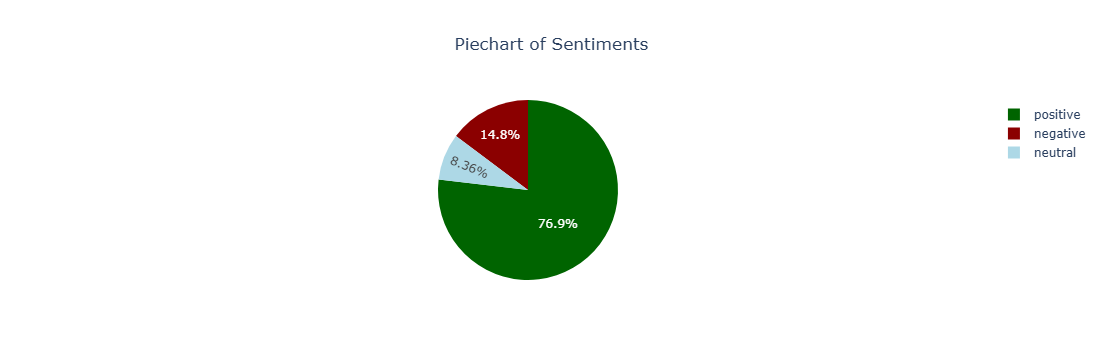

In [23]:
# Plotting Distribution of sentiments
fig = go.Figure(data=[go.Pie(labels=df['polarity'].value_counts().index.tolist(),
                             values=df['polarity'].value_counts().tolist(),
                            marker=dict(colors=['#006400','#8B0000','#add8e6']))])

fig.update_layout(title_text='Piechart of Sentiments',title_x=0.5,
                  template='plotly_white')
fig.show()

##### Most of the reviews are positive (almost 77%)

##### Positive Sentiment Word Cloud

In [24]:
def get_data(df,senti):
    s_df = df[df['polarity']==senti].reset_index()
    
    s_corpus = []
    for i in range(0,len(s_df)):
        text = re.sub('[^a-zA-Z]', ' ', s_df['review'][i])
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stop_words]
        text = ' '.join(text)
        s_corpus.append(text)
    return s_corpus

p_corpus = get_data(df,'positive')
n_corpus = get_data(df,'negative')
nt_corpus = get_data(df,'neutral')

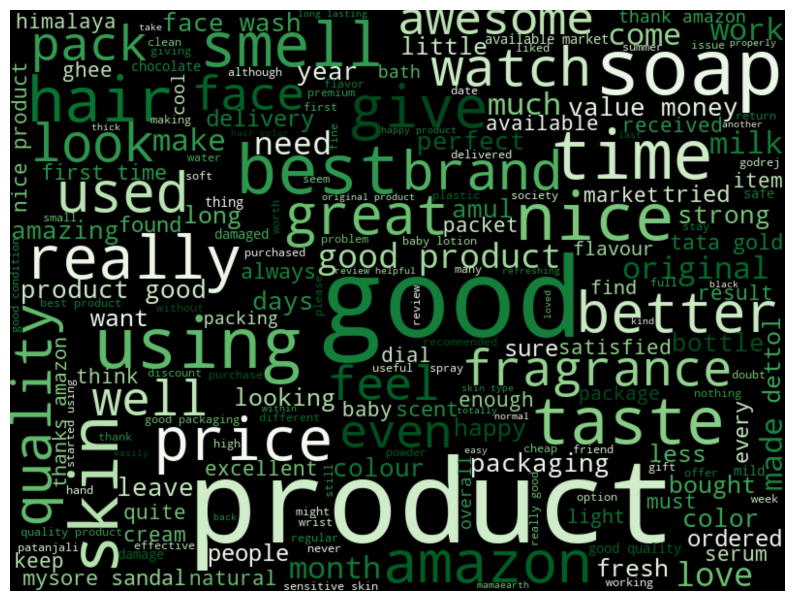

In [25]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Greens', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(p_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

##### Negative Sentiment Word Cloud

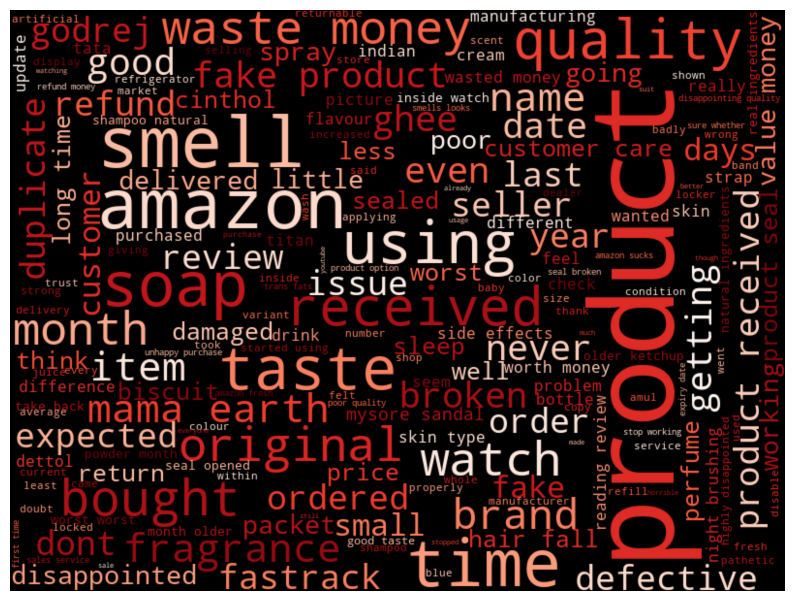

In [26]:

word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Reds', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(n_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

##### Neutral Sentiment Word Cloud

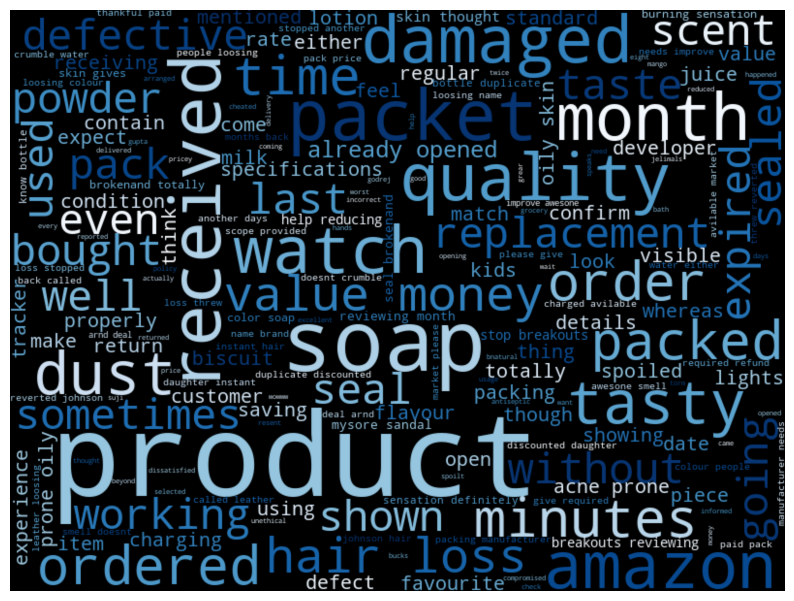

In [27]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(nt_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()